## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

無參數
Acuuracy:  0.9736842105263158
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.         0.01796599 0.05992368 0.92211033]



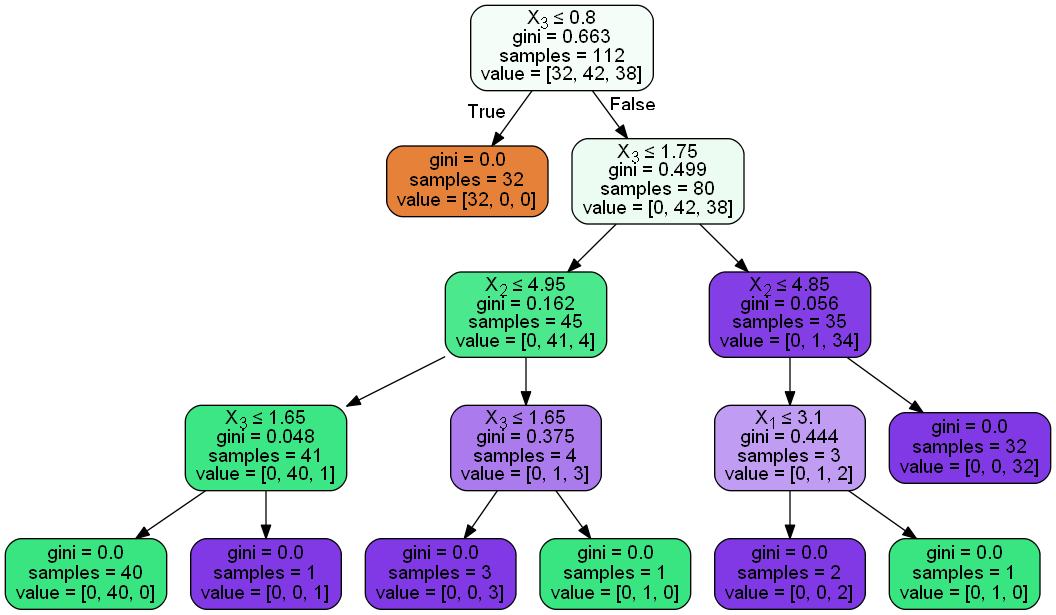

In [2]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 無參數
print('無參數')
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)
print(iris.feature_names)
print("Feature importance: ", clf.feature_importances_)
print()

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

節點最少2個可分,葉最少1個特徵
Acuuracy:  0.9736842105263158
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.         0.01796599 0.05992368 0.92211033]



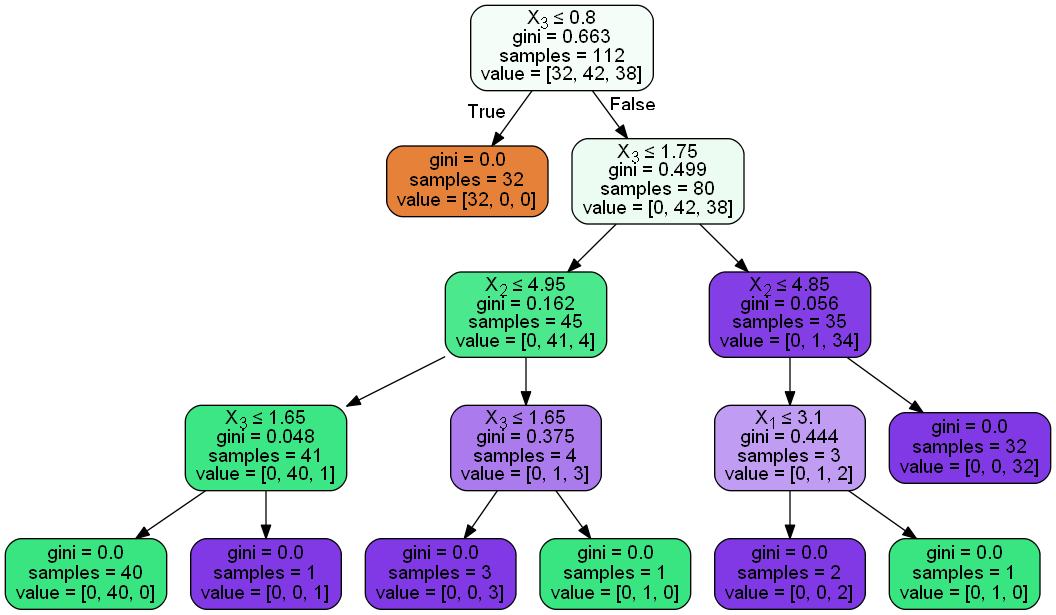

In [3]:
#節點最少2個可分,葉最少1個特徵
print('節點最少2個可分,葉最少1個特徵')
clf = DecisionTreeClassifier(
        criterion = 'gini',
        max_depth = None,
        min_samples_split = 2,
        min_samples_leaf = 1
)

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)
print(iris.feature_names)
print("Feature importance: ", clf.feature_importances_)
print()

#畫圖
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

節點最少6個可分,葉最少5個特徵
Acuuracy:  0.9736842105263158
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.         0.00213153 0.01485791 0.98301056]



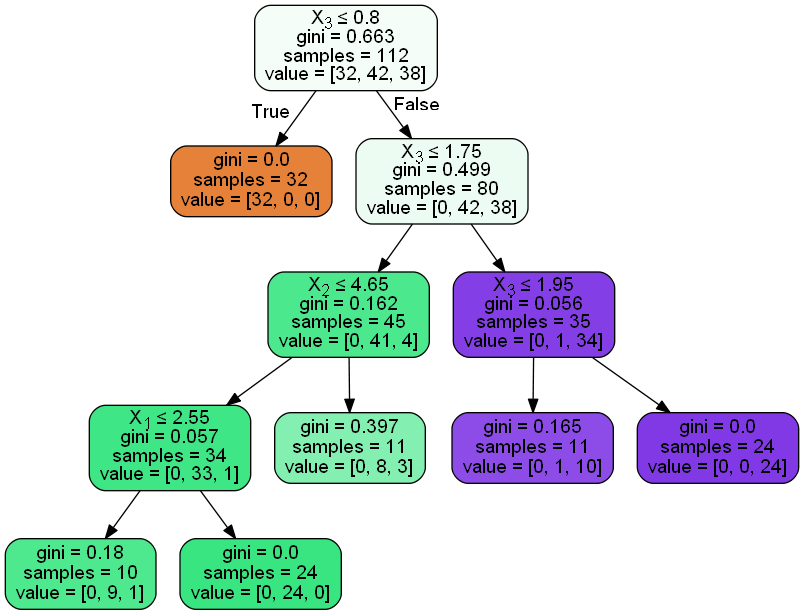

In [5]:
#節點最少6個可分,葉最少5個特徵
print('節點最少6個可分,葉最少5個特徵')
clf = DecisionTreeClassifier(
        criterion = 'gini',
        max_depth = None,
        min_samples_split = 11,
        min_samples_leaf = 10
)

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)
print(iris.feature_names)
print("Feature importance: ", clf.feature_importances_)
print()

#畫圖
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

最多3層,節點最少2個可分,葉最少1個特徵
Acuuracy:  0.9736842105263158
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.         0.         0.06405315 0.93594685]



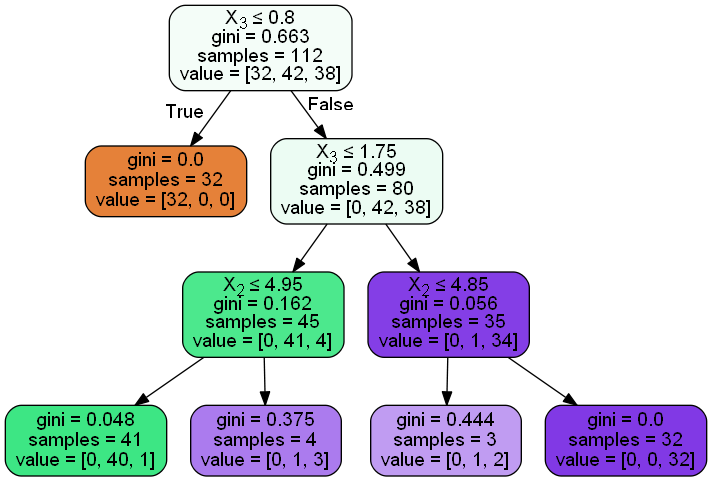

In [7]:
#最多2層,節點最少2個可分,葉最少1個特徵
print('最多3層,節點最少2個可分,葉最少1個特徵')
clf = DecisionTreeClassifier(
        criterion = 'gini',
        max_depth = 3,
        min_samples_split = 2,
        min_samples_leaf = 1
)

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)
print(iris.feature_names)
print("Feature importance: ", clf.feature_importances_)
print()

#畫圖
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Wine, 節點最少2個可分,葉最少1個特徵
Accruaty: 0.9111111111111111
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Feature importance:  [0.01364138 0.         0.         0.         0.         0.10004551
 0.04296585 0.         0.         0.41184168 0.         0.04285558
 0.38865   ]



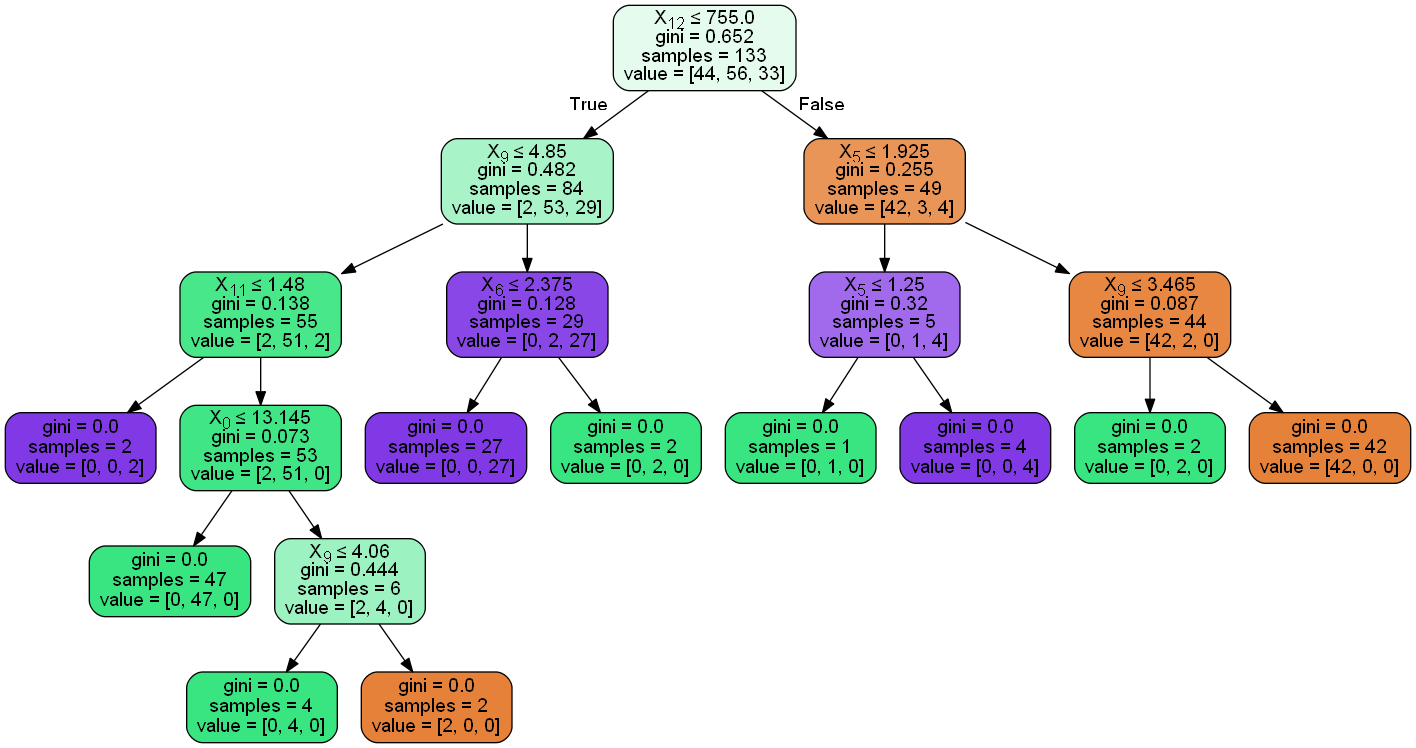

In [9]:
#讀取wine資料集
wine = datasets.load_wine()
#切分資料集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25 , random_state=4)

#wine
print('Wine, 節點最少2個可分,葉最少1個特徵')
clf = DecisionTreeClassifier(
        criterion = 'gini',
        max_depth = None,
        min_samples_split = 2,
        min_samples_leaf = 1
)

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print('Accruaty:', acc)
print(wine.feature_names)
print("Feature importance: ", clf.feature_importances_)
print()

#畫圖
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

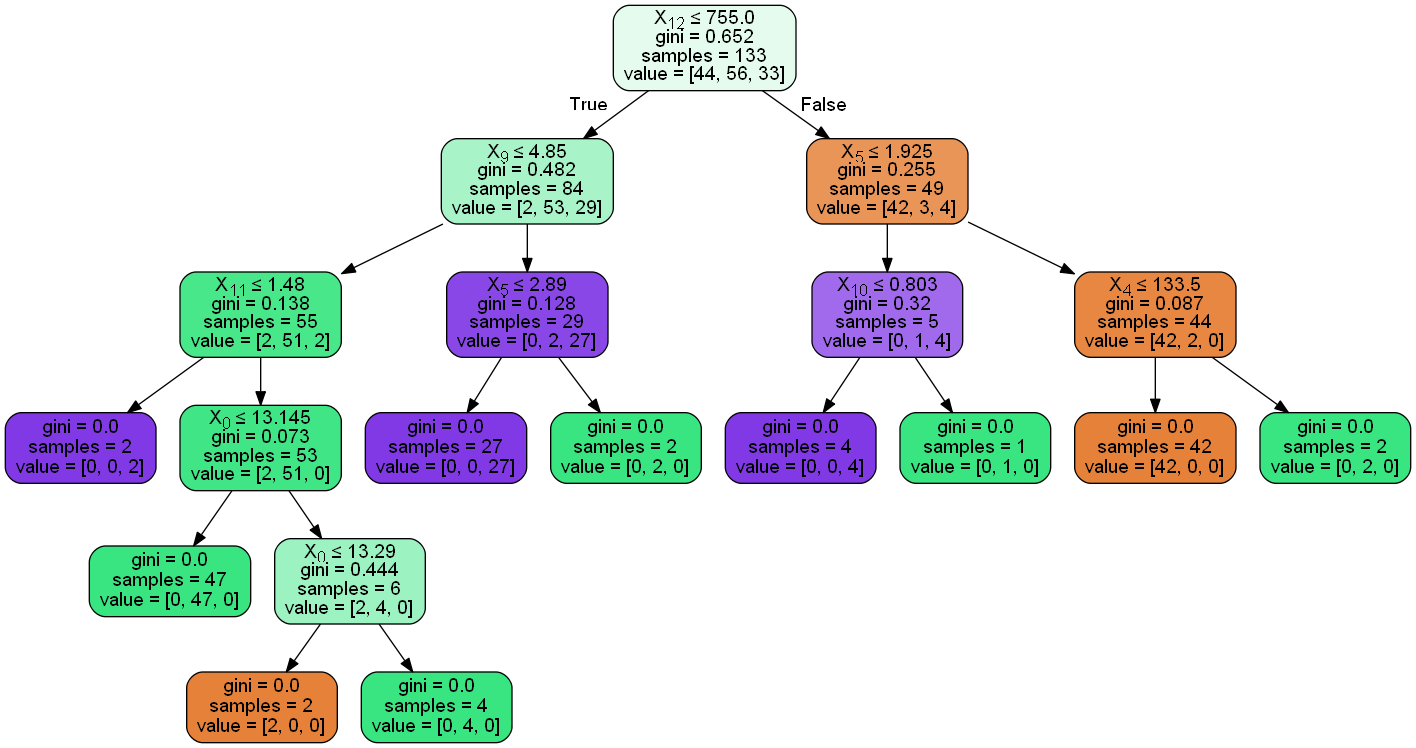

In [8]:
print('Wine, 節點最少2個可分,葉最少1個特徵')
clf = DecisionTreeClassifier(
        criterion = 'gini',
        max_depth = None,
        min_samples_split = 2,
        min_samples_leaf = 1
)

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print('Accruaty:', acc)
print(wine.feature_names)
print("Feature importance: ", clf.feature_importances_)
print()

#畫圖
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Boston, 節點最少2個可分,葉最少1個特徵
Accruaty: 0.9777777777777777
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Feature importance:  [0.         0.         0.         0.00299987 0.         0.
 0.61367513 0.         0.         0.1214791  0.00985672 0.
 0.25198917]



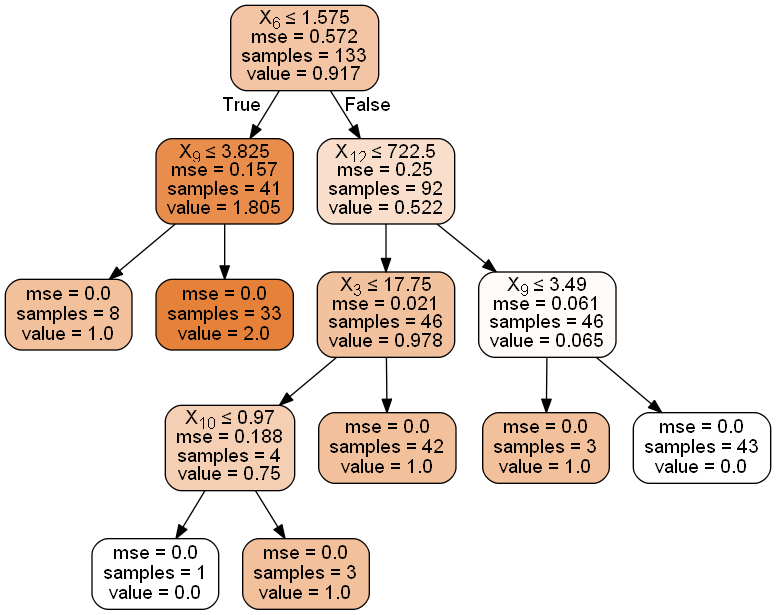

In [14]:
#讀取boston資料集
boston = datasets.load_boston()
#切分資料集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25 , random_state=4)

#wine
print('Boston, 節點最少2個可分,葉最少1個特徵')
clf = DecisionTreeRegressor(
        criterion = 'mse',
        max_depth = None,
        min_samples_split = 2,
        min_samples_leaf = 1
)

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print('Accruaty:', acc)
print(boston.feature_names)
print("Feature importance: ", clf.feature_importances_)
print()

#畫圖
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())